# k-NN classifier - Full PCA dataset

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
DATA_DIR = '../../data/reduced/full/'

In [3]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'PCA_train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         53188 non-null  float64
 1   1         53188 non-null  float64
 2   phishing  53188 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.2 MB


,0,1,phishing
0,4830.801961,-6330.299302,1
1,-14467.013254,15757.274788,0
2,-31170.196073,-5210.997729,0
3,-26445.554390,-2455.233558,1
4,-14570.950655,-1111.213349,0


In [4]:
valid_data = pd.read_csv(DATA_DIR + 'PCA_valid.csv')

valid_data.info()
valid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17729 entries, 0 to 17728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         17729 non-null  float64
 1   1         17729 non-null  float64
 2   phishing  17729 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 415.6 KB


,0,1,phishing
0,5415.186815,8258.201001,1
1,15674.611993,7932.382171,1
2,-17073.070175,-4104.591626,0
3,-31149.738016,-5158.790821,0
4,-18442.641510,8602.424313,0


In [5]:
test_data = pd.read_csv(DATA_DIR + 'PCA_test.csv')

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17730 entries, 0 to 17729
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         17730 non-null  float64
 1   1         17730 non-null  float64
 2   phishing  17730 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 415.7 KB


,0,1,phishing
0,-15993.023610,-5551.742121,1
1,30811.232069,-6153.150604,0
2,-4491.923092,4680.105707,1
3,-12066.791484,15720.718702,0
4,5497.471347,-5012.329154,0


## Get X and y data

In [6]:
TARGET_COL_NAME = 'phishing'

In [7]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)
y_train = train_data[TARGET_COL_NAME]

In [8]:
y_train.value_counts()

0    34800
1    18388
Name: phishing, dtype: int64

In [9]:
X_valid = valid_data.drop(TARGET_COL_NAME, axis=1)
y_valid = valid_data[TARGET_COL_NAME]

In [10]:
y_valid.value_counts()

0    11600
1     6129
Name: phishing, dtype: int64

In [11]:
X_test = test_data.drop(TARGET_COL_NAME, axis=1)
y_test = test_data[TARGET_COL_NAME]

In [12]:
y_test.value_counts()

0    11600
1     6130
Name: phishing, dtype: int64

## Hyperparameter tuning

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Grid search over hyperparameters
neighbors_cnts = [1, 3, 5, 10, 20, 30]

for neighbors_cnt in neighbors_cnts:
    print('Neighbors count: {}'.format(neighbors_cnt))

    clf = KNeighborsClassifier(n_neighbors=neighbors_cnt, n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_valid)

    print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
          .format(accuracy_score(y_valid, y_pred),
                  balanced_accuracy_score(y_valid, y_pred),
                  f1_score(y_valid, y_pred),
                  precision_score(y_valid, y_pred),
                  recall_score(y_valid, y_pred)))
    print('-' * 20)

Neighbors count: 1
Validation data - Accuracy: 0.820, Balanced accuracy: 0.804, F1: 0.742, Precision: 0.736, Recall: 0.749
--------------------
Neighbors count: 3
Validation data - Accuracy: 0.817, Balanced accuracy: 0.797, F1: 0.735, Precision: 0.737, Recall: 0.732
--------------------
Neighbors count: 5
Validation data - Accuracy: 0.809, Balanced accuracy: 0.787, F1: 0.721, Precision: 0.728, Recall: 0.714
--------------------
Neighbors count: 10
Validation data - Accuracy: 0.802, Balanced accuracy: 0.765, F1: 0.693, Precision: 0.746, Recall: 0.647
--------------------
Neighbors count: 20
Validation data - Accuracy: 0.791, Balanced accuracy: 0.754, F1: 0.677, Precision: 0.725, Recall: 0.635
--------------------
Neighbors count: 30
Validation data - Accuracy: 0.781, Balanced accuracy: 0.739, F1: 0.656, Precision: 0.717, Recall: 0.605
--------------------


## Retrain the best model - training + validation dataset

In [15]:
best_neighbors_cnt = 1

In [16]:
X_train_and_valid = pd.concat([X_train, X_valid])
X_train_and_valid.shape

(70917, 2)

In [17]:
y_train_and_valid = pd.concat([y_train, y_valid])
y_train_and_valid.shape

(70917,)

In [18]:
best_clf = KNeighborsClassifier(n_neighbors=best_neighbors_cnt, n_jobs=-1)

best_clf.fit(X_train_and_valid, y_train_and_valid)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

## Save trained model

In [20]:
from joblib import dump

dump(best_clf, "../../models/knn_pca_full_model.pkl") 

['../../models/knn_pca_full_model.pkl']

## Evaluate on test data

In [13]:
from joblib import load

best_clf = load("../../models/knn_pca_full_model.pkl") 

In [14]:
from sklearn.metrics import matthews_corrcoef, roc_curve
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('Balanced accuracy', balanced_accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('FPR', fpr)
]

In [15]:
y_pred = best_clf.predict(X_test)

Metric values:

F1: 0.756
Accuracy: 0.831
Balanced accuracy: 0.814
MCC: 0.627
Precision: 0.753
Recall: 0.760
FPR: 0.132




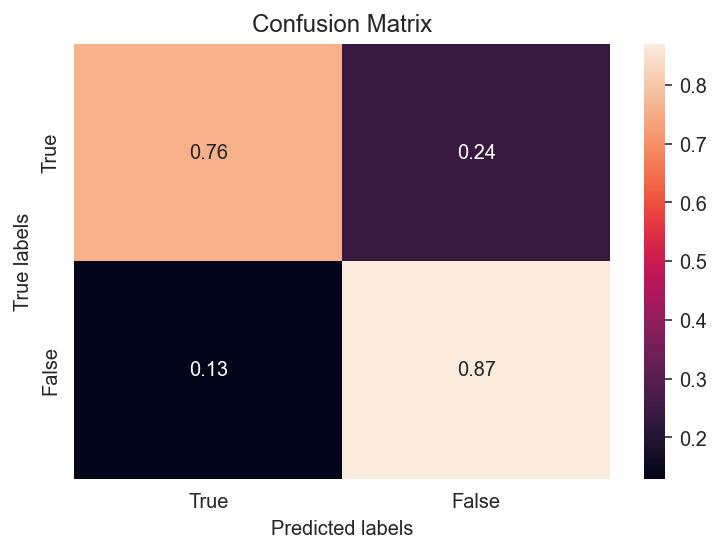

In [16]:
from bin.evaluation.evaluation import evaluate_classifier

evaluate_classifier(y_test, y_pred, y_pred, METRICS)